In [2]:
from news_signals import signals
import json
import copy
import requests
import matplotlib.pyplot as plt

# utility function for getting a wikidata id from an entity name

WIKIDATA_SEARCH_URL = "https://www.wikidata.org/w/api.php"
DEFAULT_SEARCH_PARAMS = {
    "action": "wbsearchentities",
    "format": "json",
    "errorformat": "plaintext",
    "language": "en",
    "uselang": "en",
    "type": "item",
    "limit": 1
}
WD_ENTITY_BASE_URL = 'https://www.wikidata.org/wiki/Special:EntityData'
    

def search_wikidata(surface_form, min_length=3):
    params = copy.deepcopy(DEFAULT_SEARCH_PARAMS)
    params["search"] = surface_form
    result = []
    try:
        print(f'querying wikidata with params: {params}')
        r = requests.get(url=WIKIDATA_SEARCH_URL, params=params)
        data = json.loads(r.text)
        if 'search' in data:
            result = data['search']
            result = result[0:min(100, len(result))]
    except Exception as e:
        print(f'Error searching wikidata for surface form: {surface_form}')
        print(e)
    return result


def plot_with_wikipedia_current_events(signal, ts_column):
    plt.figure(figsize=(10, 3))
    signal.timeseries_df[ts_column].plot()
    for row in signal.feeds_df[~signal.feeds_df['wikipedia_current_events'].isna()].iterrows():
        timestamp = row[0]
        plt.axvline(timestamp, color='red', linestyle='--', linewidth=1)


In [3]:
# let's setup the entity we want to work with

entity_name = 'Javier Milei'
# entity_name = 'Rishi Sunak'

entity = search_wikidata(entity_name)[0]
wikidata_id = entity['id']
print(entity['description'])
print(entity['id'])

signal = signals.AylienSignal(
    name=entity_name,
    params={"entity_ids": [wikidata_id]}
)

start = '2023-01-01'
end = '2023-11-21'
ts_signal = signal(start, end)

querying wikidata with params: {'action': 'wbsearchentities', 'format': 'json', 'errorformat': 'plaintext', 'language': 'en', 'uselang': 'en', 'type': 'item', 'limit': 1, 'search': 'Javier Milei'}
Argentine politician and economist (born 1970)
Q52395487


In [4]:
ts_signal.add_wikimedia_pageviews_timeseries()

,count,published_at,wikimedia_pageviews
date,,,
2023-01-01 00:00:00+00:00,2,2023-01-01T00:00:00Z,427
2023-01-02 00:00:00+00:00,0,2023-01-02T00:00:00Z,384
2023-01-03 00:00:00+00:00,5,2023-01-03T00:00:00Z,427
2023-01-04 00:00:00+00:00,7,2023-01-04T00:00:00Z,680
2023-01-05 00:00:00+00:00,6,2023-01-05T00:00:00Z,635
...,...,...,...
2023-11-16 00:00:00+00:00,216,2023-11-16T00:00:00Z,5169
2023-11-17 00:00:00+00:00,264,2023-11-17T00:00:00Z,6731
2023-11-18 00:00:00+00:00,209,2023-11-18T00:00:00Z,9327


In [5]:
ts_signal.add_wikipedia_current_events(overwrite_existing=True)

100%|██████████| 3/3 [00:03<00:00,  1.20s/it]


In [6]:
for ts, row in ts_signal.feeds_df[~ts_signal.feeds_df['wikipedia_current_events'].isna()].iterrows():
    event = row[1]
    print(ts, event['text'])

2023-08-13 00:00:00+00:00 Libertarian Party candidate Javier Milei wins the primaries, with around a third of the votes.
2023-10-22 00:00:00+00:00 Argentines elect the president and the members of the legislature. Sergio Massa and Javier Milei receives ~36% and ~30% of the votes respectively and will face off in a second round.
2023-11-19 00:00:00+00:00 Javier Milei of La Libertad Avanza is elected president after beating Peronist Sergio Massa 56% to 44% in the second round run-off.
2023-11-21 00:00:00+00:00 The Chinese Foreign Ministry warns Argentina against severing ties as a "serious mistake", after president-elect Javier Milei vowed to do so.


/tmp/ipykernel_663372/1389596216.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  event = row[1]


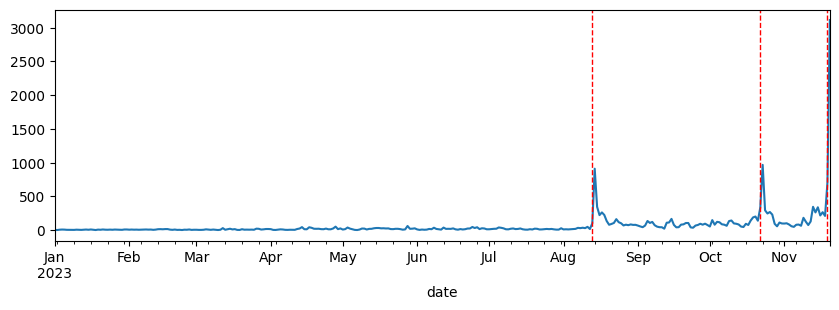

In [7]:
plot_with_wikipedia_current_events(ts_signal, 'count')

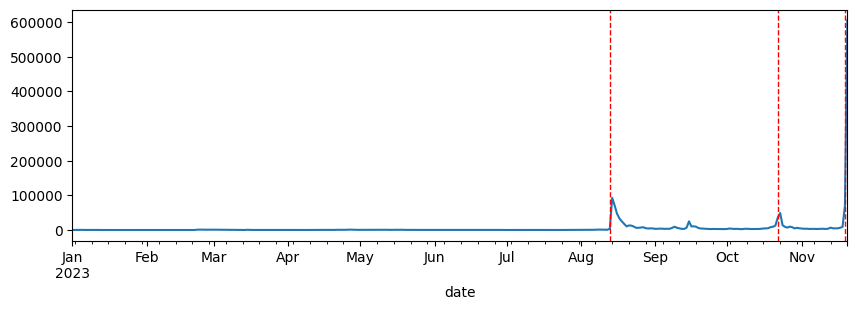

In [8]:
plot_with_wikipedia_current_events(ts_signal, 'wikimedia_pageviews')

## Microsoft

In [90]:
entity_name = 'Microsoft'

entity = search_wikidata(entity_name)[0]
wikidata_id = entity['id']
print(entity['description'])
print(entity['id'])

querying wikidata with params: {'action': 'wbsearchentities', 'format': 'json', 'errorformat': 'plaintext', 'language': 'en', 'uselang': 'en', 'type': 'item', 'limit': 1, 'search': 'Microsoft'}
American multinational technology corporation
Q2283


In [91]:
signal = signals.AylienSignal(
    name=entity_name,
    params={"entity_ids": [wikidata_id]}
)

start = '2023-01-01'
end = '2023-11-21'
ts_signal = signal(start, end)

In [92]:
ts_signal.add_wikimedia_pageviews_timeseries()

,count,published_at,wikimedia_pageviews
date,,,
2023-01-01 00:00:00+00:00,815,2023-01-01T00:00:00Z,8457
2023-01-02 00:00:00+00:00,2109,2023-01-02T00:00:00Z,11091
2023-01-03 00:00:00+00:00,3143,2023-01-03T00:00:00Z,11763
2023-01-04 00:00:00+00:00,4042,2023-01-04T00:00:00Z,11888
2023-01-05 00:00:00+00:00,4296,2023-01-05T00:00:00Z,12436
...,...,...,...
2023-11-16 00:00:00+00:00,3769,2023-11-16T00:00:00Z,10520
2023-11-17 00:00:00+00:00,2814,2023-11-17T00:00:00Z,12968
2023-11-18 00:00:00+00:00,1850,2023-11-18T00:00:00Z,15905


In [93]:
ts_signal.add_wikipedia_current_events(overwrite_existing=True)

100%|██████████| 105/105 [00:17<00:00,  5.98it/s]


In [96]:
for ts, row in ts_signal.feeds_df[~ts_signal.feeds_df['wikipedia_current_events'].isna()].iterrows():
    event = row[1]
    print(ts, event['text'])

2023-01-10 00:00:00+00:00 Microsoft ends support for Windows 8.1 and security updates for Windows 7.
2023-01-18 00:00:00+00:00 Microsoft announces that it will cut 10,000 jobs, around 5% of its global workforce, amid a slowdown in consumer spending.
2023-02-08 00:00:00+00:00 The UK Competition and Markets Authority provisionally concludes that the proposed acquisition of Activision Blizzard by Microsoft will likely lead to a substantial loss of competition in the console market and could strengthen Microsoft's position in cloud gaming.
2023-04-26 00:00:00+00:00 The United Kingdom's Competition and Markets Authority blocks Microsoft's $68.7bn (£55bn) acquisition of Activision Blizzard, saying that the deal will leave video gamers with less choice and will reduce innovation.
2023-07-11 00:00:00+00:00 United States judge Jacqueline Scott Corley approves technology company Microsoft's $69 billion acquisition of video game publisher Activision Blizzard, the largest video game acquisition in

/tmp/ipykernel_559535/1389596216.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  event = row[1]


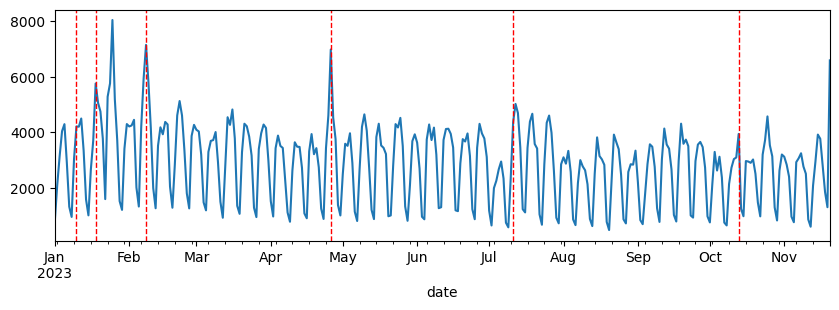

In [94]:
plot_with_wikipedia_current_events(ts_signal, 'count')

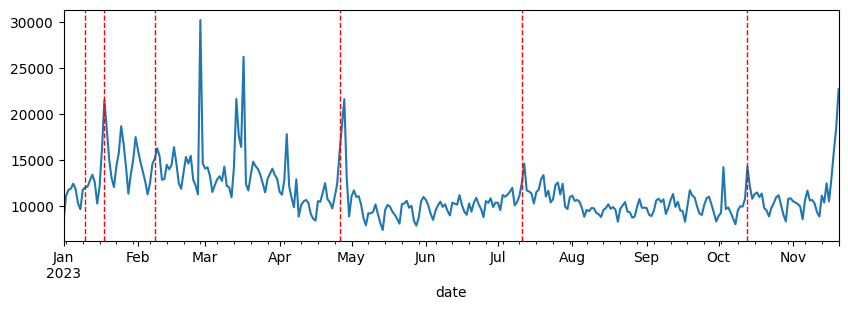

In [95]:
plot_with_wikipedia_current_events(ts_signal, 'wikimedia_pageviews')